# HW1: Practice with Python, hard-margin SVM, and linear regression

## Anais Corona Perez (NetId: coronaperez)

Hello Students:

- Start by downloading HW1.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- I've included the output from my solution in HW1.html so you can check your
  work. Your output should match or be close to mine. Use 3 significant
  figures for floats. e.g. We can print 3 figures for 𝜋/1000 as
  print(f'{np.pi/1000:.3}'). The pattern is print(f'{x:.precision}'),
  where x is the value to print and precision is the number of figures.
- If you have questions, please ask them in class or office hours. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- Please clean up your code:
  - Comment out unnecessary code that is useful for orienting you, like printing the data set.
  - Label your output, like writing 'weight=20.1' or 'The weight is 20.1' rather than just '20.1'.
  - Simplify your code if you can.
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW01.ipynb to Canvas's HW01.ipynb assignment
  - HW01.html to Canvas's HW01.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2a, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, linear_model

# 1. Use a hard-margin SVM
 to classify cars as having automatic or manual transmissions.
- Read [http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv](http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv) into a DataFrame. (This is the mtcars data frame from R with two of its rows removed to get linearly separable data.)
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0).)
- Make an X from the wt (weight in 1000s of pounds) and mpg (miles per gallon) columns. Make y from the am column (where 0=automatic
  or 1=manual transmission).
- Train an SVM using kernel='linear' and C=1000. Print its coefficients and intercept.
- Report the training accuracy. (It's given by clf.score(X, y).)
- Predict the transmission for a car weighing 4000 pounds (wt=4) that gets 20 mpg.
- Use five plt.plot() calls to make a figure with wt on its x-axis and mpg on its y-axis including:
  - the automatic transmission cars in red
  - the manual transmission cars in blue
  - the decision boundary (the center line of the road)
  - the lower margin boundary (the left side of the road)
  - the upper margin boundary (the right side of the road)
  - a reasonable title, axis labels, and legend

Coefficients = -8.24 and -0.309
Intercept = 32.0
Using the produced coefficients and intercept, the decision boundary is: -8.24 * weight -0.309 * mileage + 32 = 0
The training accuracy is 1.0
My prediction for a car weighing 20 thousand lbs with 20 mpg has transmission type: 0 = Automatic Transmission


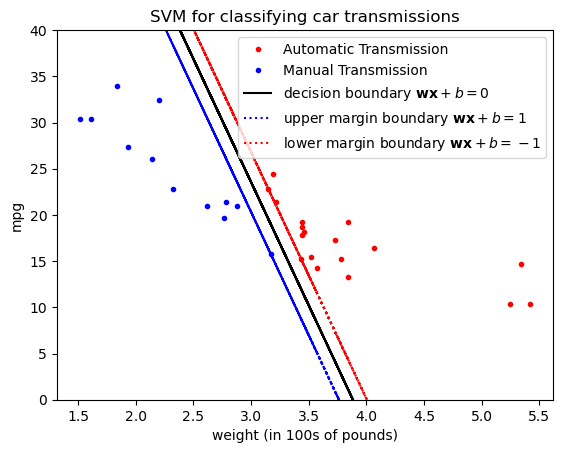

In [2]:
# Convert csv file into a dataframe
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv', index_col=0)

# Create X and y
X = df[['wt', 'mpg']].values # Matrix from wt and mpg columns
y = df.am.values # Vector of am values

# Train model
clf = svm.SVC(kernel = 'linear', C = 1000)
clf.fit(X, y)

# Graph
# Cars with automatic _transmission are plotted red
plt.plot(df.wt[df.am == 0], df.mpg[df.am == 0], '.', color = 'red', label = 'Automatic Transmission')
# Cars with manual transmission are plotted blue
plt.plot(df.wt[df.am == 1], df.mpg[df.am == 1], '.', color = 'blue', label = 'Manual Transmission')

#Plot decision boundary
x1 = df.wt
x2 = -(clf.coef_[0][0]*x1 + clf.intercept_)/clf.coef_[0][1]
plt.plot(x1, x2, color = 'black', label = r'decision boundary $\mathbf{wx} + b = 0$')

#Plot upper margin boundary
plt.plot(x1, x2 + 1/clf.coef_[0][1], color = 'blue', linestyle = ':', label = r'upper margin boundary $\mathbf{wx} + b = 1$')

#Plot lower margin boundary
plt.plot(x1, x2 - 1/clf.coef_[0][1], color = 'red', linestyle = ':', label = r'lower margin boundary $\mathbf{wx} + b = -1$')

plt.title('SVM for classifying car transmissions')
plt.ylabel('mpg')
plt.xlabel('weight (in 100s of pounds)')
plt.legend()
plt.ylim(0, 40)

print(f'Coefficients = {clf.coef_[0][0]:.3} and {clf.coef_[0][1]:.3}') # w1 and w2
print(f'Intercept = {clf.intercept_[0]:.3}') # b
print(f'Using the produced coefficients and intercept, the decision boundary is: -8.24 * weight -0.309 * mileage + 32 = 0')
print(f'The training accuracy is {clf.score(X, y)}')
print(f'My prediction for a car weighing 20 thousand lbs with 20 mpg has transmission type: {clf.predict([[4, 20]])[0]} = Automatic Transmission')





# 2. Make three linear regression models.


## 2a: Make a simple regression model by hand.
Use the matrix formula $w = (X^T X)^{-1} X^T y$ we developed in class to fit these three points:
(0, 5), (2, 1), (4, 3). (Use linear_model.linearRegression(), if you wish, to check your work.)

Get $X$, $X^T$, and $\mathbf{y}$:

$X = \begin{bmatrix} 1 & 0\\ 1 & 2\\ 1 & 4  \end{bmatrix} \hspace{1cm}
 X^T = \begin{bmatrix} 1 & 1 & 1\\ 0 & 2 & 4 \end{bmatrix} \hspace{1cm}
 \mathbf{y} = \begin{bmatrix}5\\1\\3\end{bmatrix} $

Begin solving for $\mathbf{w}$:

First, find $X^TX:$

$X^TX = \begin{bmatrix} 1 & 1 & 1\\ 0 & 2 & 4 \end{bmatrix} \cdot \begin{bmatrix}1 & 0\\1 & 2\\1 & 4\end{bmatrix} = \begin{bmatrix} 3 & 6\\ 6 & 20 \end{bmatrix}$

Since $X^TX$ is a 2 x 2 matrix, we can use the following to find its inverse:

$\begin{bmatrix} a & b\\ c & d\end{bmatrix}^{-1} = \frac{1}{ad - bc}\cdot\begin{bmatrix} d & -b\\ -c & a \end{bmatrix} $

$(X^TX)^{-1} = \begin{bmatrix} 3 & 6\\ 6 & 20 \end{bmatrix}^{-1} = \frac{1}{60 - 36}\cdot\begin{bmatrix} 20 & -6\\ -6 & 3 \end{bmatrix} = \frac{1}{24}\cdot\begin{bmatrix} 20 & -6\\ -6 & 3 \end{bmatrix} = \begin{bmatrix} 5/6 & -1/4\\ -1/4 & 1/8 \end{bmatrix}$

Now, multiply $(X^TX)^{-1}$ by $X^T$:

$(X^TX)^{-1}X^T = \begin{bmatrix} 5/6 & -1/4\\ -1/4 & 1/8 \end{bmatrix} \cdot \begin{bmatrix} 1 & 1 & 1\\ 0 & 2 & 4 \end{bmatrix} = \begin{bmatrix} 5/6 & 2/6 & -1/6\\ -1/4 & 0 & 1/4 \end{bmatrix}$

Finally, multiply $(X^TX)^{-1}X^T$ by $\mathbf{y}$:

$(X^TX)^{-1}X^T\mathbf{y} = \begin{bmatrix} 5/6 & 2/6 & -1/6\\ -1/4 & 0 & 1/4 \end{bmatrix}\cdot\begin{bmatrix}5\\1\\3\end{bmatrix} = \begin{bmatrix}4\\-1/2\end{bmatrix} = w$

Our model $\hat{y} = wx + b$ is:

$\hat{y} = w_1x + w_0 = \frac{-1}{2}x + 4$ 


Slope = -0.5
Intercept = 4.0


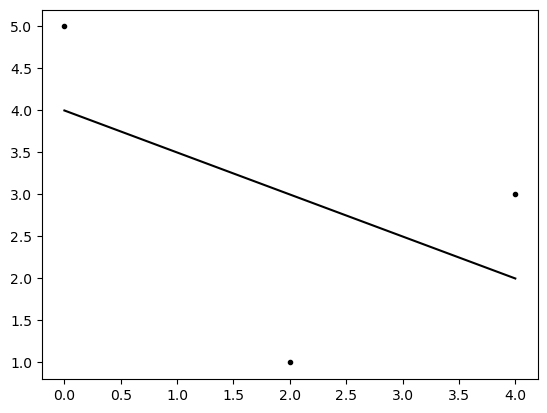

In [3]:
#Check work
X = np.array([[1, 0], [1, 2], [1, 4]])
y = np.array([[5], [1], [3]])
reg = linear_model.LinearRegression().fit(X, y)
print(f'Slope = {reg.coef_[0][1]:.3}')
print(f'Intercept = {reg.intercept_[0]:.3}')

#Graph
x = [0, 2, 4]
y = [5, 1, 3]
y2 = [4, 3, 2]
plt.plot(x, y, '.', color = 'black')
plt.plot(x, y2, color = 'black')


## 2b: Make a simple linear regression model from real data.
Estimate the average daily trading volume of a Dow Jones Industrial Average stock from its market capitalization. That is, use $y = $ AvgVol vs. $x =$ MarketCap.
- Read [http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv](http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv) into a DataFrame.
  (I used df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol').)
- Find the model. Print its equation.
- Print its $R^2$ value (the proportion of variability in $y$ accounted for by $x$ via the linear model, given by model.score(X, y)).
- Make a plot of the data and model line.
- Use the model to predict the volume for a company with market capitalization of 0.25e12 (a quarter-trillion dollars); add this as a red point on your plot.
- Say what happens to Volume as Market Capitalization increases. (Use a Markdown cell.)

Where y is Volume and x is Market Capitalization, the model is: y = 2.68e-05x + 3.41e+06
R-squared value = 0.705
For a company with Market Capitalization = 0.25e12, the predicted volume is 1.01e+07


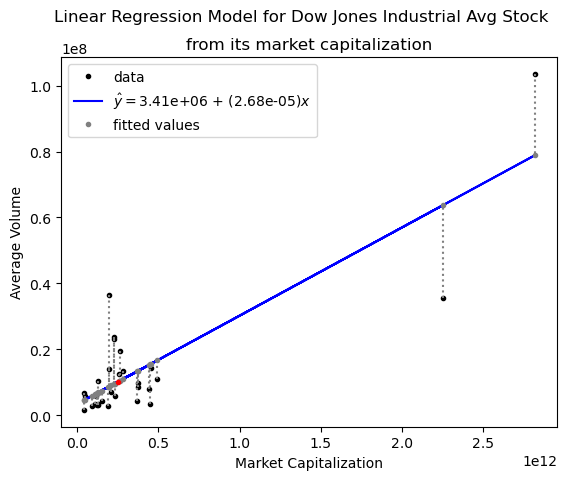

In [4]:
# Convert csv file into a dataframe 
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol')
# Create X and y
X = df[['MarketCap']].values
y = df.AvgVol.values

# Create model and print equation
model = linear_model.LinearRegression()
model.fit(X, y)
print(f'Where y is Volume and x is Market Capitalization, the model is: y = {model.coef_[0]:.3}x + {model.intercept_:.3}')

# Print R-squared value
print(f'R-squared value = {model.score(X, y):.3}')

#Plot
y_hat = model.predict(X)
x = df.MarketCap #Get a 1D array necessary for plotting; 2D is needed for fitting

# Place datapoints
plt.plot(x, y, '.', color = 'black', label = 'data')

#Plot regression line and its points
plt.plot(x, y_hat, color = 'blue', label = f'$\\hat{{y}}=${model.intercept_:.3} + ({model.coef_[0]:.3})$x$')
plt.plot(x, y_hat, '.', color = 'grey', label = f'fitted values')

#Plot differences from y to y_hat
plt.plot([x, x], [y, y_hat], ':', color = 'grey', label = None)

plt.legend()
plt.title('from its market capitalization')
plt.suptitle('Linear Regression Model for Dow Jones Industrial Avg Stock')
plt.xlabel('Market Capitalization')
plt.ylabel('Average Volume')

#Predict Volume
pred_vol = model.predict([[0.25e12]])
print(f'For a company with Market Capitalization = 0.25e12, the predicted volume is {pred_vol[0]:.3}')
plt.plot(0.25e12, pred_vol, '.', color = 'red')

As Market Capitalization increases, so does the Volume; however, the rate at which it increases volume would be very small since its coefficient (2.68e-05) is near zero. 

## 2c Make a multiple regression model.
Estimate the same volume from both market capitalization and price. That is, use $y =$ AvgVol vs. $x_1 =$ MarketCap and $x_2 =$ Price.
- Find the model.
- Print its equation.
- Print its $R^2$ value.
- Say what happens to Volume as Market Capitalization increases and what happens to Volume as Price increases (while holding the other variable fixed). (Use a Markdown cell.)

In [5]:
# Find model
X = df[['MarketCap', 'Price']].values
y = df['AvgVol'].values
model.fit(X, y)

# Print equation
print(f'The model is: AvgVol = {model.coef_[0]:.3} * MarketCap + {model.coef_[1]:.3} * Price + {model.intercept_:.3}')

# Print R-squared value
print(f'R-squared value = {model.score(X, y):.3}')

The model is: AvgVol = 2.89e-05 * MarketCap + -6.69e+04 * Price + 1.44e+07
R-squared value = 0.823


When Market Capitalization increases, keeping Price constant, the Volume increases; however, the rate at which it increases the volume will be very small due to its coefficient (2.89e-05) being near zero.

When Price increases, while keeping Market Capitalization constant, the Volume decreases. 

\' \'